In [1]:
%pip install scikit-learn
%pip install seaborn 


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler  # Fix import statement
# to prevent unnecessary warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# TensorFlow and tf.keras
import tensorflow as tf

from pathlib import Path

# get modules from sklearn library
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pandas as pd

2024-02-04 23:48:03.697012: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-04 23:48:03.697187: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-04 23:48:03.749993: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-04 23:48:03.905042: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-04 23:48:06.085384: W tensorflow/compiler/tf2

In [3]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('metadata - standardized.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12449 entries, 0 to 12448
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   names                     12449 non-null  object 
 1   types                     12449 non-null  int64  
 2   type_expanded             6577 non-null   object 
 3   isColor                   12449 non-null  int64  
 4   original_name             12449 non-null  object 
 5   patient_id                488 non-null    object 
 6   fundus                    12449 non-null  object 
 7   fundus_od_seg             3103 non-null   object 
 8   fundus_oc_seg             3103 non-null   object 
 9   bv_seg                    462 non-null    object 
 10  artery_seg                22 non-null     object 
 11  vein_seg                  22 non-null     object 
 12  oct                       79 non-null     object 
 13  oct_oc_seg                45 non-null     object 
 14  oct_od

In [5]:
data[data['fundus_oc_seg'].notnull() & data['fundus_od_seg'].notnull()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3102 entries, 4546 to 12048
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   names                     3102 non-null   object 
 1   types                     3102 non-null   int64  
 2   type_expanded             1848 non-null   object 
 3   isColor                   3102 non-null   int64  
 4   original_name             3102 non-null   object 
 5   patient_id                488 non-null    object 
 6   fundus                    3102 non-null   object 
 7   fundus_od_seg             3102 non-null   object 
 8   fundus_oc_seg             3102 non-null   object 
 9   bv_seg                    0 non-null      object 
 10  artery_seg                0 non-null      object 
 11  vein_seg                  0 non-null      object 
 12  oct                       44 non-null     object 
 13  oct_oc_seg                44 non-null     object 
 14  oct_od_se

In [6]:
theData = data[data['fundus_oc_seg'].notnull() & data['fundus_oc_seg'].notnull() & data['fundus_od_seg'].notnull() & (data['types'] != -1)]

theData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3034 entries, 4546 to 12048
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   names                     3034 non-null   object 
 1   types                     3034 non-null   int64  
 2   type_expanded             1780 non-null   object 
 3   isColor                   3034 non-null   int64  
 4   original_name             3034 non-null   object 
 5   patient_id                420 non-null    object 
 6   fundus                    3034 non-null   object 
 7   fundus_od_seg             3034 non-null   object 
 8   fundus_oc_seg             3034 non-null   object 
 9   bv_seg                    0 non-null      object 
 10  artery_seg                0 non-null      object 
 11  vein_seg                  0 non-null      object 
 12  oct                       44 non-null     object 
 13  oct_oc_seg                44 non-null     object 
 14  oct_od_se

In [7]:
theData['eye'].value_counts()

eye
OD    560
OS    554
Name: count, dtype: int64

In [8]:
theData['eye'] = theData['eye'].replace({'OD': 0, 'OS': 1})

theData['eye'].value_counts()

theData['eye']

/tmp/ipykernel_7114/704693265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theData['eye'] = theData['eye'].replace({'OD': 0, 'OS': 1})


4546     0.0
4547     1.0
4548     1.0
4549     0.0
4550     1.0
        ... 
12044    1.0
12045    1.0
12046    1.0
12047    1.0
12048    1.0
Name: eye, Length: 3034, dtype: float64

In [9]:
theData['fundus'][12044]

'/full-fundus/PAPILA-484.png'

In [10]:
theData['fundus_oc_seg'][12044]

'/optic-cup/PAPILA-484.png'

In [11]:
theData['fundus_od_seg'][12044]

'/optic-disc/PAPILA-484.png'

full-fundus/full-fundus/PAPILA-484.png


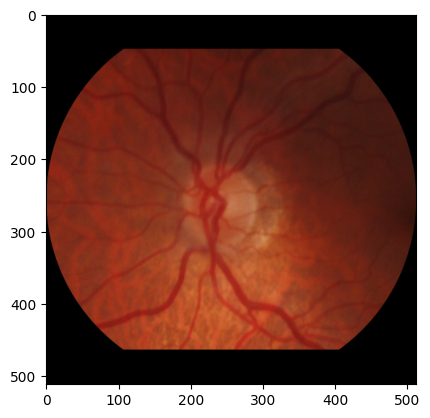

optic-cup/optic-cup/PAPILA-484.png


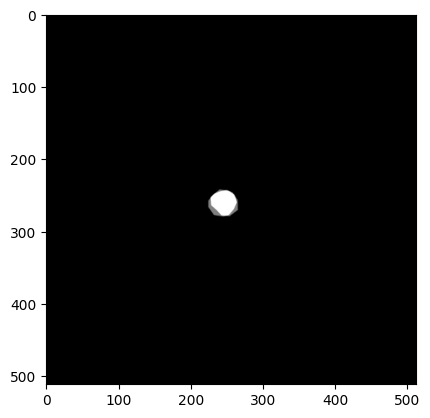

optic-disc/optic-disc/PAPILA-484.png


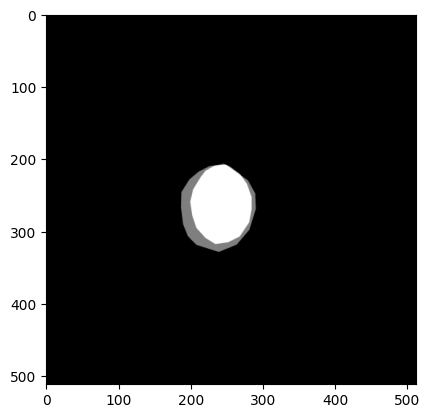

In [12]:
def viewFundus(image_path):

    image_path = 'full-fundus' + image_path

    print(image_path)

    # Load the image
    image = cv2.imread(image_path)

    # Convert the image from BGR to RGB color space
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(image_rgb)
    plt.axis('on')  # Hide the axis to only show the image
    plt.show()

def viewOpticCup(image_path):

    image_path = 'optic-cup' + image_path

    print(image_path)

    # Load the image
    image = cv2.imread(image_path)

    # Convert the image from BGR to RGB color space
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(image_rgb)
    plt.axis('on')  # Hide the axis to only show the image
    plt.show()

def viewOpticDisc(image_path):

    image_path = 'optic-disc' + image_path

    print(image_path)

    # Load the image
    image = cv2.imread(image_path)

    # Convert the image from BGR to RGB color space
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(image_rgb)
    plt.axis('on')  # Hide the axis to only show the image
    plt.show()


viewFundus(theData['fundus'][12044])
viewOpticCup(theData['fundus_oc_seg'][12044])
viewOpticDisc(theData['fundus_od_seg'][12044])

optic-cup/optic-cup/PAPILA-484.png
optic-cup/optic-cup/PAPILA-484.png


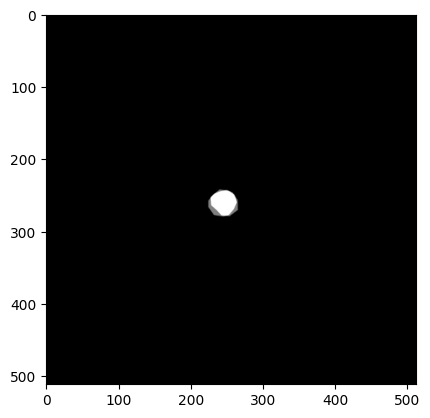

Normalized Area: 0.004856109619140625


In [13]:
import cv2
import numpy as np

def compute_normalized_area(masked_image_path):

    masked_image_path = 'optic-cup' + masked_image_path

    masked_image = cv2.imread(masked_image_path)

    print(masked_image_path)
    
    # Convert the masked image to grayscale
    gray = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)

    # Threshold the grayscale image to obtain a binary mask
    _, binary_mask = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

    # Compute the area of the white region
    white_area = np.sum(binary_mask == 255)

    # Normalize the area by dividing by the total number of pixels
    total_pixels = masked_image.shape[0] * masked_image.shape[1]
    normalized_area = white_area / total_pixels

    return normalized_area

# Compute normalized area
normalized_area = compute_normalized_area(theData['fundus_oc_seg'][12044])

viewOpticCup(theData['fundus_oc_seg'][12044])

print(f"Normalized Area: {normalized_area}")

In [14]:
theData['fundus_oc_seg'].value_counts()

fundus_oc_seg
Not Visible                         229
/optic-cup/ORIGA-1.png                1
/optic-cup/G1020-341.png              1
/optic-cup/G1020-343.png              1
/optic-cup/G1020-344.png              1
                                   ... 
/optic-cup/REFUGE1-train-287.png      1
/optic-cup/REFUGE1-train-288.png      1
/optic-cup/REFUGE1-train-289.png      1
/optic-cup/REFUGE1-train-290.png      1
/optic-cup/PAPILA-488.png             1
Name: count, Length: 2806, dtype: int64

In [15]:
import cv2
import numpy as np
import pandas as pd

theData['OC size'] = 0.0

def compute_normalized_area(masked_image_path):

    try:

        masked_image_path = 'optic-cup' + masked_image_path

        masked_image = cv2.imread(masked_image_path)

        print(masked_image_path)
        
        gray = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)

        _, binary_mask = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

        white_area = np.sum(binary_mask == 255)

        total_pixels = masked_image.shape[0] * masked_image.shape[1]
        normalized_area = white_area / total_pixels

        return normalized_area

    except Exception as e:
        
        print(f"Skipping: Error processing image at {masked_image_path}: {e}")
        return None

for index, row in theData.iterrows():
    normalized_area = compute_normalized_area(row['fundus_oc_seg'])
    theData.at[index, 'OC size'] = normalized_area

theData

optic-cup/optic-cup/ORIGA-1.png
optic-cup/optic-cup/ORIGA-2.png
optic-cup/optic-cup/ORIGA-3.png
optic-cup/optic-cup/ORIGA-4.png
optic-cup/optic-cup/ORIGA-5.png
optic-cup/optic-cup/ORIGA-6.png
optic-cup/optic-cup/ORIGA-7.png
optic-cup/optic-cup/ORIGA-8.png


/tmp/ipykernel_7114/3320648963.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theData['OC size'] = 0.0


optic-cup/optic-cup/ORIGA-9.png
optic-cup/optic-cup/ORIGA-10.png
optic-cup/optic-cup/ORIGA-11.png
optic-cup/optic-cup/ORIGA-12.png
optic-cup/optic-cup/ORIGA-13.png
optic-cup/optic-cup/ORIGA-14.png
optic-cup/optic-cup/ORIGA-15.png
optic-cup/optic-cup/ORIGA-16.png
optic-cup/optic-cup/ORIGA-17.png
optic-cup/optic-cup/ORIGA-18.png
optic-cup/optic-cup/ORIGA-19.png
optic-cup/optic-cup/ORIGA-20.png
optic-cup/optic-cup/ORIGA-21.png
optic-cup/optic-cup/ORIGA-22.png
optic-cup/optic-cup/ORIGA-23.png
optic-cup/optic-cup/ORIGA-24.png
optic-cup/optic-cup/ORIGA-25.png
optic-cup/optic-cup/ORIGA-26.png
optic-cup/optic-cup/ORIGA-27.png
optic-cup/optic-cup/ORIGA-28.png
optic-cup/optic-cup/ORIGA-29.png
optic-cup/optic-cup/ORIGA-30.png
optic-cup/optic-cup/ORIGA-31.png
optic-cup/optic-cup/ORIGA-32.png
optic-cup/optic-cup/ORIGA-33.png
optic-cup/optic-cup/ORIGA-34.png
optic-cup/optic-cup/ORIGA-35.png
optic-cup/optic-cup/ORIGA-36.png
optic-cup/optic-cup/ORIGA-37.png
optic-cup/optic-cup/ORIGA-38.png
optic-cup/o

[ WARN:0@18.283] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@18.302] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@18.303] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@18.341] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@18.342] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@18.409] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@18.478] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity


optic-cup/optic-cup/G1020-26.png
optic-cup/optic-cup/G1020-27.png
optic-cup/optic-cup/G1020-28.png
optic-cup/optic-cup/G1020-29.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-31.png
optic-cup/optic-cup/G1020-32.png
optic-cup/optic-cup/G1020-33.png
optic-cup/optic-cup/G1020-34.png
optic-cup/optic-cup/G1020-35.png
optic-cup/optic-cup/G1020-36.png
optic-cup/optic-cup/G1020-37.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-39.png
optic-cup/optic-cup/G1020-40.png
optic-cup/optic-cup/G1020-41.png
optic-cup/optic-cup/G1020-42.png
optic-cup/optic-cup/G1020-43.png
optic-cup/optic-cup/G1020-44.png
optic-cup/optic-cup/G10

[ WARN:0@18.549] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@18.654] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@18.656] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@18.686] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@18.716] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@18.745] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity


optic-cup/optic-cup/G1020-57.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-59.png
optic-cup/optic-cup/G1020-60.png
optic-cup/optic-cup/G1020-61.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-63.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

opt

[ WARN:0@18.756] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@18.756] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@18.835] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@18.856] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@18.895] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity


optic-cup/optic-cup/G1020-85.png
optic-cup/optic-cup/G1020-86.png
optic-cup/optic-cup/G1020-87.png
optic-cup/optic-cup/G1020-88.png
optic-cup/optic-cup/G1020-89.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-91.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-93.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error:

[ WARN:0@18.967] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@18.980] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@18.991] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@18.992] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@19.004] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@19.086] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@19.087] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@19.127] global loadsave.cpp:248 findDecoder imread_('

optic-cup/optic-cup/G1020-111.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-113.png
optic-cup/optic-cup/G1020-114.png
optic-cup/optic-cup/G1020-115.png
optic-cup/optic-cup/G1020-116.png
optic-cup/optic-cup/G1020-117.png
optic-cup/optic-cup/G1020-118.png
optic-cup/optic-cup/G1020-119.png
optic-cup/optic-cup/G1020-120.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-122.png
optic-cup/optic-cup/G1020-123.png
optic-cup/optic-cup/G1020-124.png
optic-cup/optic-cup/G1020-125.png
optic-cup/optic-cup/G1020-126.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modu

[ WARN:0@19.210] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@19.259] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@19.300] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@19.321] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@19.321] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity


optic-cup/optic-cup/G1020-137.png
optic-cup/optic-cup/G1020-138.png
optic-cup/optic-cup/G1020-139.png
optic-cup/optic-cup/G1020-140.png
optic-cup/optic-cup/G1020-141.png
optic-cup/optic-cup/G1020-142.png
optic-cup/optic-cup/G1020-143.png
optic-cup/optic-cup/G1020-144.png
optic-cup/optic-cup/G1020-145.png
optic-cup/optic-cup/G1020-146.png
optic-cup/optic-cup/G1020-147.png
optic-cup/optic-cup/G1020-148.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-151.png
optic-cup/optic-cup/G1020-152.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modu

[ WARN:0@19.438] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@19.439] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@19.458] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@19.478] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@19.479] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@19.501] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@19.512] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@19.512] global loadsave.cpp:248 findDecoder imread_('

optic-cup/optic-cup/G1020-165.png
optic-cup/optic-cup/G1020-166.png
optic-cup/optic-cup/G1020-167.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-169.png
optic-cup/optic-cup/G1020-170.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-173.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_

[ WARN:0@19.750] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@19.791] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@19.849] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@19.870] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@19.890] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@19.900] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@19.912] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@19.922] global loadsave.cpp:248 findDecoder imread_('

optic-cup/optic-cup/G1020-220.png
optic-cup/optic-cup/G1020-221.png
optic-cup/optic-cup/G1020-222.png
optic-cup/optic-cup/G1020-223.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-225.png
optic-cup/optic-cup/G1020-226.png
optic-cup/optic-cup/G1020-227.png
optic-cup/optic-cup/G1020-228.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-230.png
optic-cup/optic-cup/G1020-231.png
optic-cup/optic-cup/G1020-232.png
optic-cup/optic-cup/G1020-233.png
optic-cup/optic-cup/G1020-234.png
optic-cup/optic-cup/G1020-235.png
optic-cup/optic-cup/G1020-236.png
optic-cup/optic-cup/G1020-237.png
optic-cup/optic-cup/G1020-238.png
optic-

[ WARN:0@19.974] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@20.013] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@20.115] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@20.126] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity


optic-cup/optic-cup/G1020-244.png
optic-cup/optic-cup/G1020-245.png
optic-cup/optic-cup/G1020-246.png
optic-cup/optic-cup/G1020-247.png
optic-cup/optic-cup/G1020-248.png
optic-cup/optic-cup/G1020-249.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-253.png
optic-cup/optic-cup/G1020-254.png
optic-cup/optic-cup/G1020-255.png
optic-cup/optic-cup/G1020-256.png
optic-cup/optic-cup/G1020-257.png
op

[ WARN:0@20.195] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@20.196] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@20.197] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@20.249] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@20.324] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@20.334] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity


optic-cup/optic-cup/G1020-270.png
optic-cup/optic-cup/G1020-271.png
optic-cup/optic-cup/G1020-272.png
optic-cup/optic-cup/G1020-273.png
optic-cup/optic-cup/G1020-274.png
optic-cup/optic-cup/G1020-275.png
optic-cup/optic-cup/G1020-276.png
optic-cup/optic-cup/G1020-277.png
optic-cup/optic-cup/G1020-278.png
optic-cup/optic-cup/G1020-279.png
optic-cup/optic-cup/G1020-280.png
optic-cup/optic-cup/G1020-281.png
optic-cup/optic-cup/G1020-282.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-284.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-286.png
optic-cup/optic-cup/G1020-287.png
optic-cup/optic-cup/G1020-288.png
optic-

[ WARN:0@20.468] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@20.478] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@20.558] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@20.569] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@20.636] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity


optic-cup/optic-cup/G1020-293.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-295.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-297.png
optic-cup/optic-cup/G1020-298.png
optic-cup/optic-cup/G1020-299.png
optic-cup/optic-cup/G1020-300.png
optic-cup/optic-cup/G1020-301.png
optic-cup/optic-cup/G1020-302.png
optic-cup/optic-cup/G1020-303.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-305.png
optic-cup/optic-cup/G1020-306.png
op

[ WARN:0@20.790] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@20.828] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@20.889] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity


optic-cup/optic-cup/G1020-340.png
optic-cup/optic-cup/G1020-341.png
optic-cup/optic-cup/G1020-342.png
optic-cup/optic-cup/G1020-343.png
optic-cup/optic-cup/G1020-344.png
optic-cup/optic-cup/G1020-345.png
optic-cup/optic-cup/G1020-346.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-348.png
optic-cup/optic-cup/G1020-349.png
optic-cup/optic-cup/G1020-350.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-353.png
op

[ WARN:0@21.027] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@21.059] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@21.060] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity


optic-cup/optic-cup/G1020-363.png
optic-cup/optic-cup/G1020-364.png
optic-cup/optic-cup/G1020-365.png
optic-cup/optic-cup/G1020-366.png
optic-cup/optic-cup/G1020-367.png
optic-cup/optic-cup/G1020-368.png
optic-cup/optic-cup/G1020-369.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-371.png
optic-cup/optic-cup/G1020-372.png
optic-cup/optic-cup/G1020-373.png
optic-cup/optic-cup/G1020-374.png
optic-cup/optic-cup/G1020-375.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-377.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: err

[ WARN:0@21.230] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@21.279] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@21.289] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@21.327] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@21.356] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@21.365] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity


optic-cup/optic-cup/G1020-390.png
optic-cup/optic-cup/G1020-391.png
optic-cup/optic-cup/G1020-392.png
optic-cup/optic-cup/G1020-393.png
optic-cup/optic-cup/G1020-394.png
optic-cup/optic-cup/G1020-395.png
optic-cup/optic-cup/G1020-396.png
optic-cup/optic-cup/G1020-397.png
optic-cup/optic-cup/G1020-398.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-401.png
optic-cup/optic-cup/G1020-402.png
optic-cup/optic-cup/G1020-403.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.

[ WARN:0@21.453] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@21.454] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@21.483] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@21.502] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@21.523] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@21.563] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@21.629] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity


optic-cup/optic-cup/G1020-417.png
optic-cup/optic-cup/G1020-418.png
optic-cup/optic-cup/G1020-419.png
optic-cup/optic-cup/G1020-420.png
optic-cup/optic-cup/G1020-421.png
optic-cup/optic-cup/G1020-422.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-424.png
optic-cup/optic-cup/G1020-425.png
optic-cup/optic-cup/G1020-426.png
optic-cup/optic-cup/G1020-427.png
optic-cup/optic-cup/G1020-428.png
optic-cup/optic-cup/G1020-429.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-431.png
optic-cup/optic-cup/G1020-432.png
optic-cup/optic-cup/G1020-433.png
optic-cup/optic-cup/G1020-434.png
optic-cup/optic-cup/G1020-435.png
optic-

[ WARN:0@21.687] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@21.759] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@21.789] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@21.864] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@21.882] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity


optic-cup/optic-cup/G1020-441.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-443.png
optic-cup/optic-cup/G1020-444.png
optic-cup/optic-cup/G1020-445.png
optic-cup/optic-cup/G1020-446.png
optic-cup/optic-cup/G1020-447.png
optic-cup/optic-cup/G1020-448.png
optic-cup/optic-cup/G1020-449.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-451.png
optic-cup/optic-cup/G1020-452.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-454.png
op

[ WARN:0@21.894] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@21.895] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@21.906] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@21.944] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@21.984] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@22.005] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@22.025] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity


optic-cup/optic-cup/G1020-469.png
optic-cup/optic-cup/G1020-470.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-472.png
optic-cup/optic-cup/G1020-473.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-475.png
optic-cup/optic-cup/G1020-476.png
optic-cup/optic-cup/G1020-477.png
optic-cup/optic-cup/G1020-478.png
optic-cup/optic-cup/G1020-479.png
optic-cup/optic-cup/G1020-480.png
optic-cup/optic-cup/G1020-481.png
optic-cup/optic-cup/G1020-482.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.

[ WARN:0@22.106] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@22.107] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@22.159] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@22.160] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@22.174] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@22.252] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@22.253] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@22.254] global loadsave.cpp:248 findDecoder imread_('

optic-cup/optic-cup/G1020-493.png
optic-cup/optic-cup/G1020-494.png
optic-cup/optic-cup/G1020-495.png
optic-cup/optic-cup/G1020-496.png
optic-cup/optic-cup/G1020-497.png
optic-cup/optic-cup/G1020-498.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-502.png
optic-cup/optic-cup/G1020-503.png
optic-cup/optic-cup/G1020-504.png
optic-cup/optic-cup/G1020-505.png
optic-cup/optic-cup/G1020-506.png
op

[ WARN:0@22.322] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@22.333] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@22.341] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@22.342] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@22.404] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@22.405] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@22.449] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@22.450] global loadsave.cpp:248 findDecoder imread_('

optic-cup/optic-cup/G1020-524.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-527.png
optic-cup/optic-cup/G1020-528.png
optic-cup/optic-cup/G1020-529.png
optic-cup/optic-cup/G1020-530.png
optic-cup/optic-cup/G1020-531.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_

[ WARN:0@22.561] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@22.613] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@22.623] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@22.623] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@22.624] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@22.624] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@22.654] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@22.655] global loadsave.cpp:248 findDecoder imread_('

optic-cup/optic-cup/G1020-554.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-556.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/ope

[ WARN:0@22.844] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@22.845] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@22.846] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@22.847] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@22.925] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@22.926] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@22.936] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@22.946] global loadsave.cpp:248 findDecoder imread_('

optic-cup/optic-cup/G1020-616.png
optic-cup/optic-cup/G1020-617.png
optic-cup/optic-cup/G1020-618.png
optic-cup/optic-cup/G1020-619.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-621.png
optic-cup/optic-cup/G1020-622.png
optic-cup/optic-cup/G1020-623.png
optic-cup/optic-cup/G1020-624.png
optic-cup/optic-cup/G1020-625.png
optic-cup/optic-cup/G1020-626.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-628.png
optic-cup/optic-cup/G1020-629.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.

[ WARN:0@23.047] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@23.110] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@23.131] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@23.154] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@23.236] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@23.249] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity


optic-cup/optic-cup/G1020-640.png
optic-cup/optic-cup/G1020-641.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-643.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-646.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-648.pn

[ WARN:0@23.249] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@23.259] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@23.397] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@23.407] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity


optic-cup/optic-cup/G1020-666.png
optic-cup/optic-cup/G1020-667.png
optic-cup/optic-cup/G1020-668.png
optic-cup/optic-cup/G1020-669.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-671.png
optic-cup/optic-cup/G1020-672.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-674.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-676.png
optic-cup/optic-cup/G1020-677.png
optic-cup/optic-cup/G1020-678.png
optic-cup/optic-cup/G1020-679.png
op

[ WARN:0@23.458] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@23.479] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@23.490] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@23.538] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@23.570] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@23.599] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@23.600] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@23.611] global loadsave.cpp:248 findDecoder imread_('

optic-cup/optic-cup/G1020-695.png
optic-cup/optic-cup/G1020-696.png
optic-cup/optic-cup/G1020-697.png
optic-cup/optic-cup/G1020-698.png
optic-cup/optic-cup/G1020-699.png
optic-cup/optic-cup/G1020-700.png
optic-cup/optic-cup/G1020-701.png
optic-cup/optic-cup/G1020-702.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-704.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-707.png
optic-cup/optic-cup/G1020-708.png
op

[ WARN:0@23.702] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@23.713] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@23.714] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@23.803] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@23.813] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity


optic-cup/optic-cup/G1020-720.png
optic-cup/optic-cup/G1020-721.png
optic-cup/optic-cup/G1020-722.png
optic-cup/optic-cup/G1020-723.png
optic-cup/optic-cup/G1020-724.png
optic-cup/optic-cup/G1020-725.png
optic-cup/optic-cup/G1020-726.png
optic-cup/optic-cup/G1020-727.png
optic-cup/optic-cup/G1020-728.png
optic-cup/optic-cup/G1020-729.png
optic-cup/optic-cup/G1020-730.png
optic-cup/optic-cup/G1020-731.png
optic-cup/optic-cup/G1020-732.png
optic-cup/optic-cup/G1020-733.png
optic-cup/optic-cup/G1020-734.png
optic-cup/optic-cup/G1020-735.png
optic-cup/optic-cup/G1020-736.png
optic-cup/optic-cup/G1020-737.png
optic-cup/optic-cup/G1020-738.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-740.png
optic-cup/optic-cup/G1020-741.png
optic-cup/optic-cup/G1020-742.png
optic-cup/optic-cup/G1020-743.png
optic-cup/

[ WARN:0@24.015] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@24.076] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@24.098] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@24.128] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@24.129] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@24.130] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@24.190] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@24.191] global loadsave.cpp:248 findDecoder imread_('

optic-cup/optic-cup/G1020-765.png
optic-cup/optic-cup/G1020-766.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-768.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-770.png
optic-cup/optic-cup/G1020-771.png
optic-cup/optic-cup/G1020-772.png
optic-cup/optic-cup/G1020-773.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-775.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/

[ WARN:0@24.222] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@24.234] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@24.281] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@24.290] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@24.324] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@24.349] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@24.357] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@24.358] global loadsave.cpp:248 findDecoder imread_('

optic-cup/optic-cup/G1020-797.png
optic-cup/optic-cup/G1020-798.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-800.png
optic-cup/optic-cup/G1020-801.png
optic-cup/optic-cup/G1020-802.png
optic-cup/optic-cup/G1020-803.png
optic-cup/optic-cup/G1020-804.png
optic-cup/optic-cup/G1020-805.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-807.png
optic-cup/optic-cup/G1020-808.png
optic-cup/optic-cup/G1020-809.png
optic-cup/optic-cup/G1020-810.png
optic-cup/optic-cup/G1020-811.png
optic-cup/optic-cup/G1020-812.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modu

[ WARN:0@24.427] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@24.483] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@24.533] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@24.543] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@24.569] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@24.595] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity


optic-cup/optic-cup/G1020-827.png
optic-cup/optic-cup/G1020-828.png
optic-cup/optic-cup/G1020-829.png
optic-cup/optic-cup/G1020-830.png
optic-cup/optic-cup/G1020-831.png
optic-cup/optic-cup/G1020-832.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-834.png
optic-cup/optic-cup/G1020-835.png
optic-cup/optic-cup/G1020-836.png
optic-cup/optic-cup/G1020-837.png
optic-cup/optic-cup/G1020-838.png
optic-cup/optic-cup/G1020-839.png
optic-cup/optic-cup/G1020-840.png
optic-cup/optic-cup/G1020-841.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-843.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visi

[ WARN:0@24.663] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@24.731] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@24.740] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@24.783] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@24.800] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@24.817] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@24.860] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity


optic-cup/optic-cup/G1020-863.png
optic-cup/optic-cup/G1020-864.png
optic-cup/optic-cup/G1020-865.png
optic-cup/optic-cup/G1020-866.png
optic-cup/optic-cup/G1020-867.png
optic-cup/optic-cup/G1020-868.png
optic-cup/optic-cup/G1020-869.png
optic-cup/optic-cup/G1020-870.png
optic-cup/optic-cup/G1020-871.png
optic-cup/optic-cup/G1020-872.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-874.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-876.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.

[ WARN:0@24.953] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@24.963] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@24.974] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@24.975] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@24.985] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@25.025] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@25.026] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@25.047] global loadsave.cpp:248 findDecoder imread_('

optic-cup/optic-cup/G1020-892.png
optic-cup/optic-cup/G1020-893.png
optic-cup/optic-cup/G1020-894.png
optic-cup/optic-cup/G1020-895.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-897.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-899.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-901.png
optic-cup/optic-cup/G1020-902.png
optic-cup/optic-cup/G1020-903.png
optic-cup/optic-cup/G1020-904.png
optic-cup/optic-cup/G1020-905.png
op

[ WARN:0@25.192] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@25.303] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@25.304] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@25.363] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@25.374] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity


optic-cup/optic-cup/G1020-916.png
optic-cup/optic-cup/G1020-917.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-920.png
optic-cup/optic-cup/G1020-921.png
optic-cup/optic-cup/G1020-922.png
optic-cup/optic-cup/G1020-923.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-925.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182:

[ WARN:0@25.395] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@25.446] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@25.458] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@25.565] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@25.576] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@25.588] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity


optic-cup/optic-cup/G1020-941.png
optic-cup/optic-cup/G1020-942.png
optic-cup/optic-cup/G1020-943.png
optic-cup/optic-cup/G1020-944.png
optic-cup/optic-cup/G1020-945.png
optic-cup/optic-cup/G1020-946.png
optic-cup/optic-cup/G1020-947.png
optic-cup/optic-cup/G1020-948.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-950.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-952.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-954.png
op

[ WARN:0@25.621] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@25.630] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@25.720] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@25.778] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity


optic-cup/optic-cup/G1020-966.png
optic-cup/optic-cup/G1020-967.png
optic-cup/optic-cup/G1020-968.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-970.png
optic-cup/optic-cup/G1020-971.png
optic-cup/optic-cup/G1020-972.png
optic-cup/optic-cup/G1020-973.png
optic-cup/optic-cup/G1020-974.png
optic-cup/optic-cup/G1020-975.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-977.png
optic-cup/optic-cup/G1020-978.png
optic-cup/optic-cup/G1020-979.png
optic-cup/optic-cup/G1020-980.png
optic-cup/optic-cup/G1020-981.png
optic-cup/optic-cup/G1020-982.png
optic-cup/optic-cup/G1020-983.png
optic-cup/optic-cup/G1020-984.png
optic-

[ WARN:0@25.854] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@25.890] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@26.023] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity


optic-cup/optic-cup/G1020-1007.png
optic-cup/optic-cup/G1020-1008.png
optic-cup/optic-cup/G1020-1009.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/G1020-1011.png
optic-cup/optic-cup/G1020-1012.png
optic-cup/optic-cup/G1020-1013.png
optic-cup/optic-cup/G1020-1014.png
optic-cup/optic-cup/G1020-1015.png
optic-cup/optic-cup/G1020-1016.png
optic-cup/optic-cup/G1020-1017.png
optic-cup/optic-cup/G1020-1018.png
optic-cup/optic-cup/G1020-1019.png
optic-cupNot Visible
Skipping: Error processing image at optic-cupNot Visible: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

optic-cup/optic-cup/PAPILA-2.png
optic-cup/optic-cup/PAPILA-3.png
optic-cup/optic-cup/PAPILA-8.png
optic-cup/optic-cup/PAPILA-9.png
optic-cup/optic-cup/PAPILA-10.pn

[ WARN:0@26.079] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity
[ WARN:0@26.162] global loadsave.cpp:248 findDecoder imread_('optic-cupNot Visible'): can't open/read file: check file path/integrity


optic-cup/optic-cup/PAPILA-16.png
optic-cup/optic-cup/PAPILA-17.png
optic-cup/optic-cup/PAPILA-19.png
optic-cup/optic-cup/PAPILA-20.png
optic-cup/optic-cup/PAPILA-21.png
optic-cup/optic-cup/PAPILA-22.png
optic-cup/optic-cup/PAPILA-23.png
optic-cup/optic-cup/PAPILA-24.png
optic-cup/optic-cup/PAPILA-25.png
optic-cup/optic-cup/PAPILA-26.png
optic-cup/optic-cup/PAPILA-27.png
optic-cup/optic-cup/PAPILA-28.png
optic-cup/optic-cup/PAPILA-29.png
optic-cup/optic-cup/PAPILA-30.png
optic-cup/optic-cup/PAPILA-31.png
optic-cup/optic-cup/PAPILA-32.png
optic-cup/optic-cup/PAPILA-33.png
optic-cup/optic-cup/PAPILA-35.png
optic-cup/optic-cup/PAPILA-36.png
optic-cup/optic-cup/PAPILA-37.png
optic-cup/optic-cup/PAPILA-39.png
optic-cup/optic-cup/PAPILA-40.png
optic-cup/optic-cup/PAPILA-41.png
optic-cup/optic-cup/PAPILA-42.png
optic-cup/optic-cup/PAPILA-44.png
optic-cup/optic-cup/PAPILA-45.png
optic-cup/optic-cup/PAPILA-46.png
optic-cup/optic-cup/PAPILA-47.png
optic-cup/optic-cup/PAPILA-48.png
optic-cup/opti

,names,types,type_expanded,isColor,original_name,patient_id,fundus,fundus_od_seg,fundus_oc_seg,bv_seg,...,refractive_dioptre_1,refractive_dioptre_2,refractive_astigmatism,phakic_or_pseudophakic,iop_perkins,iop_pneumatic,pachymetry,axial_length,visual_field_mean_defect,OC size
4546,ORIGA-1,0,NaN,1,001.jpg,NaN,/full-fundus/ORIGA-1.png,/optic-disc/ORIGA-1.png,/optic-cup/ORIGA-1.png,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010849
4547,ORIGA-2,0,NaN,1,002.jpg,NaN,/full-fundus/ORIGA-2.png,/optic-disc/ORIGA-2.png,/optic-cup/ORIGA-2.png,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010250
4548,ORIGA-3,0,NaN,1,003.jpg,NaN,/full-fundus/ORIGA-3.png,/optic-disc/ORIGA-3.png,/optic-cup/ORIGA-3.png,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019222
4549,ORIGA-4,0,NaN,1,004.jpg,NaN,/full-fundus/ORIGA-4.png,/optic-disc/ORIGA-4.png,/optic-cup/ORIGA-4.png,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008072
4550,ORIGA-5,0,NaN,1,005.jpg,NaN,/full-fundus/ORIGA-5.png,/optic-disc/ORIGA-5.png,/optic-cup/ORIGA-5.png,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12044,PAPILA-484,0,Healthy,1,289,PAPILA-289,/full-fundus/PAPILA-484.png,/optic-disc/PAPILA-484.png,/optic-cup/PAPILA-484.png,NaN,...,0.75,-1.5,93,1,10,,531,22.31,,0.004856
12045,PAPILA-485,0,Healthy,1,290,PAPILA-290,/full-fundus/PAPILA-485.png,/optic-disc/PAPILA-485.png,/optic-cup/PAPILA-485.png,NaN,...,0.25,-0.25,160,1,19,,573,22.01,,0.004936
12046,PAPILA-486,0,Healthy,1,291,PAPILA-291,/full-fundus/PAPILA-486.png,/optic-disc/PAPILA-486.png,/optic-cup/PAPILA-486.png,NaN,...,1.5,-1.25,76,0,14,,443,23.51,,0.002399
12047,PAPILA-487,0,Healthy,1,292,PAPILA-292,/full-fundus/PAPILA-487.png,/optic-disc/PAPILA-487.png,/optic-cup/PAPILA-487.png,NaN,...,1.25,-0.75,79,0,9,,479,23.84,,0.006138


In [16]:
import cv2
import numpy as np
import pandas as pd

theData['OD size'] = 0.0  

def compute_normalized_area(masked_image_path):

    try:

        masked_image_path = 'optic-disc' + masked_image_path

        masked_image = cv2.imread(masked_image_path)

        print(masked_image_path)
        
        gray = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)

        _, binary_mask = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

        white_area = np.sum(binary_mask == 255)

        total_pixels = masked_image.shape[0] * masked_image.shape[1]
        normalized_area = white_area / total_pixels

        return normalized_area

    except Exception as e:
        
        print(f"Skipping: Error processing image at {masked_image_path}: {e}")
        return None

for index, row in theData.iterrows():
    normalized_area = compute_normalized_area(row['fundus_od_seg'])
    theData.at[index, 'OD size'] = normalized_area

theData

optic-disc/optic-disc/ORIGA-1.png


optic-disc/optic-disc/ORIGA-2.png
optic-disc/optic-disc/ORIGA-3.png
optic-disc/optic-disc/ORIGA-4.png
optic-disc/optic-disc/ORIGA-5.png


/tmp/ipykernel_7114/4149144155.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theData['OD size'] = 0.0


optic-disc/optic-disc/ORIGA-6.png
optic-disc/optic-disc/ORIGA-7.png
optic-disc/optic-disc/ORIGA-8.png
optic-disc/optic-disc/ORIGA-9.png
optic-disc/optic-disc/ORIGA-10.png
optic-disc/optic-disc/ORIGA-11.png
optic-disc/optic-disc/ORIGA-12.png
optic-disc/optic-disc/ORIGA-13.png
optic-disc/optic-disc/ORIGA-14.png
optic-disc/optic-disc/ORIGA-15.png
optic-disc/optic-disc/ORIGA-16.png
optic-disc/optic-disc/ORIGA-17.png
optic-disc/optic-disc/ORIGA-18.png
optic-disc/optic-disc/ORIGA-19.png
optic-disc/optic-disc/ORIGA-20.png
optic-disc/optic-disc/ORIGA-21.png
optic-disc/optic-disc/ORIGA-22.png
optic-disc/optic-disc/ORIGA-23.png
optic-disc/optic-disc/ORIGA-24.png
optic-disc/optic-disc/ORIGA-25.png
optic-disc/optic-disc/ORIGA-26.png
optic-disc/optic-disc/ORIGA-27.png
optic-disc/optic-disc/ORIGA-28.png
optic-disc/optic-disc/ORIGA-29.png
optic-disc/optic-disc/ORIGA-30.png
optic-disc/optic-disc/ORIGA-31.png
optic-disc/optic-disc/ORIGA-32.png
optic-disc/optic-disc/ORIGA-33.png
optic-disc/optic-disc/OR

,names,types,type_expanded,isColor,original_name,patient_id,fundus,fundus_od_seg,fundus_oc_seg,bv_seg,...,refractive_dioptre_2,refractive_astigmatism,phakic_or_pseudophakic,iop_perkins,iop_pneumatic,pachymetry,axial_length,visual_field_mean_defect,OC size,OD size
4546,ORIGA-1,0,NaN,1,001.jpg,NaN,/full-fundus/ORIGA-1.png,/optic-disc/ORIGA-1.png,/optic-cup/ORIGA-1.png,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010849,0.022560
4547,ORIGA-2,0,NaN,1,002.jpg,NaN,/full-fundus/ORIGA-2.png,/optic-disc/ORIGA-2.png,/optic-cup/ORIGA-2.png,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010250,0.020405
4548,ORIGA-3,0,NaN,1,003.jpg,NaN,/full-fundus/ORIGA-3.png,/optic-disc/ORIGA-3.png,/optic-cup/ORIGA-3.png,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019222,0.020947
4549,ORIGA-4,0,NaN,1,004.jpg,NaN,/full-fundus/ORIGA-4.png,/optic-disc/ORIGA-4.png,/optic-cup/ORIGA-4.png,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008072,0.015347
4550,ORIGA-5,0,NaN,1,005.jpg,NaN,/full-fundus/ORIGA-5.png,/optic-disc/ORIGA-5.png,/optic-cup/ORIGA-5.png,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008331,0.018131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12044,PAPILA-484,0,Healthy,1,289,PAPILA-289,/full-fundus/PAPILA-484.png,/optic-disc/PAPILA-484.png,/optic-cup/PAPILA-484.png,NaN,...,-1.5,93,1,10,,531,22.31,,0.004856,0.037567
12045,PAPILA-485,0,Healthy,1,290,PAPILA-290,/full-fundus/PAPILA-485.png,/optic-disc/PAPILA-485.png,/optic-cup/PAPILA-485.png,NaN,...,-0.25,160,1,19,,573,22.01,,0.004936,0.039188
12046,PAPILA-486,0,Healthy,1,291,PAPILA-291,/full-fundus/PAPILA-486.png,/optic-disc/PAPILA-486.png,/optic-cup/PAPILA-486.png,NaN,...,-1.25,76,0,14,,443,23.51,,0.002399,0.024658
12047,PAPILA-487,0,Healthy,1,292,PAPILA-292,/full-fundus/PAPILA-487.png,/optic-disc/PAPILA-487.png,/optic-cup/PAPILA-487.png,NaN,...,-0.75,79,0,9,,479,23.84,,0.006138,0.028481


In [17]:
#calculate the mean of the OD and OC sizes
print(theData['OC size'].mean())
print(theData['OD size'].mean())

0.005546413428430676
0.019637276958146217


In [18]:
theData[['OC size', 'OD size', 'eye']].groupby('eye').mean()

,OC size,OD size
eye,,
0.0,0.006170,0.022642
1.0,0.005889,0.022440


In [19]:
theData

,names,types,type_expanded,isColor,original_name,patient_id,fundus,fundus_od_seg,fundus_oc_seg,bv_seg,...,refractive_dioptre_2,refractive_astigmatism,phakic_or_pseudophakic,iop_perkins,iop_pneumatic,pachymetry,axial_length,visual_field_mean_defect,OC size,OD size
4546,ORIGA-1,0,NaN,1,001.jpg,NaN,/full-fundus/ORIGA-1.png,/optic-disc/ORIGA-1.png,/optic-cup/ORIGA-1.png,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010849,0.022560
4547,ORIGA-2,0,NaN,1,002.jpg,NaN,/full-fundus/ORIGA-2.png,/optic-disc/ORIGA-2.png,/optic-cup/ORIGA-2.png,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010250,0.020405
4548,ORIGA-3,0,NaN,1,003.jpg,NaN,/full-fundus/ORIGA-3.png,/optic-disc/ORIGA-3.png,/optic-cup/ORIGA-3.png,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019222,0.020947
4549,ORIGA-4,0,NaN,1,004.jpg,NaN,/full-fundus/ORIGA-4.png,/optic-disc/ORIGA-4.png,/optic-cup/ORIGA-4.png,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008072,0.015347
4550,ORIGA-5,0,NaN,1,005.jpg,NaN,/full-fundus/ORIGA-5.png,/optic-disc/ORIGA-5.png,/optic-cup/ORIGA-5.png,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008331,0.018131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12044,PAPILA-484,0,Healthy,1,289,PAPILA-289,/full-fundus/PAPILA-484.png,/optic-disc/PAPILA-484.png,/optic-cup/PAPILA-484.png,NaN,...,-1.5,93,1,10,,531,22.31,,0.004856,0.037567
12045,PAPILA-485,0,Healthy,1,290,PAPILA-290,/full-fundus/PAPILA-485.png,/optic-disc/PAPILA-485.png,/optic-cup/PAPILA-485.png,NaN,...,-0.25,160,1,19,,573,22.01,,0.004936,0.039188
12046,PAPILA-486,0,Healthy,1,291,PAPILA-291,/full-fundus/PAPILA-486.png,/optic-disc/PAPILA-486.png,/optic-cup/PAPILA-486.png,NaN,...,-1.25,76,0,14,,443,23.51,,0.002399,0.024658
12047,PAPILA-487,0,Healthy,1,292,PAPILA-292,/full-fundus/PAPILA-487.png,/optic-disc/PAPILA-487.png,/optic-cup/PAPILA-487.png,NaN,...,-0.75,79,0,9,,479,23.84,,0.006138,0.028481


In [20]:
# now we have obtained the masks, their sizes, cleaned up the data. time to extract features.

In [21]:
fundus_subset = theData[['types', 'fundus', 'fundus_oc_seg', 'fundus_od_seg', 'names']]

fundus_subset['combined'] = fundus_subset['names'] + '.png'

fundus_subset['fundus'] = fundus_subset['fundus'].astype(str)

fundus_subset['types'] = fundus_subset['types'].astype(str)

fundus_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3034 entries, 4546 to 12048
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   types          3034 non-null   object
 1   fundus         3034 non-null   object
 2   fundus_oc_seg  3034 non-null   object
 3   fundus_od_seg  3034 non-null   object
 4   names          3034 non-null   object
 5   combined       3034 non-null   object
dtypes: object(6)
memory usage: 230.5+ KB


/tmp/ipykernel_7114/1148764530.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fundus_subset['combined'] = fundus_subset['names'] + '.png'
/tmp/ipykernel_7114/1148764530.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fundus_subset['fundus'] = fundus_subset['fundus'].astype(str)
/tmp/ipykernel_7114/1148764530.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [22]:
fundus_subset

,types,fundus,fundus_oc_seg,fundus_od_seg,names,combined
4546,0,/full-fundus/ORIGA-1.png,/optic-cup/ORIGA-1.png,/optic-disc/ORIGA-1.png,ORIGA-1,ORIGA-1.png
4547,0,/full-fundus/ORIGA-2.png,/optic-cup/ORIGA-2.png,/optic-disc/ORIGA-2.png,ORIGA-2,ORIGA-2.png
4548,0,/full-fundus/ORIGA-3.png,/optic-cup/ORIGA-3.png,/optic-disc/ORIGA-3.png,ORIGA-3,ORIGA-3.png
4549,0,/full-fundus/ORIGA-4.png,/optic-cup/ORIGA-4.png,/optic-disc/ORIGA-4.png,ORIGA-4,ORIGA-4.png
4550,0,/full-fundus/ORIGA-5.png,/optic-cup/ORIGA-5.png,/optic-disc/ORIGA-5.png,ORIGA-5,ORIGA-5.png
...,...,...,...,...,...,...
12044,0,/full-fundus/PAPILA-484.png,/optic-cup/PAPILA-484.png,/optic-disc/PAPILA-484.png,PAPILA-484,PAPILA-484.png
12045,0,/full-fundus/PAPILA-485.png,/optic-cup/PAPILA-485.png,/optic-disc/PAPILA-485.png,PAPILA-485,PAPILA-485.png
12046,0,/full-fundus/PAPILA-486.png,/optic-cup/PAPILA-486.png,/optic-disc/PAPILA-486.png,PAPILA-486,PAPILA-486.png
12047,0,/full-fundus/PAPILA-487.png,/optic-cup/PAPILA-487.png,/optic-disc/PAPILA-487.png,PAPILA-487,PAPILA-487.png


In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

# Assuming fundus_subset is your DataFrame and 'types' is the column with labels
# Also assuming you have 'fundus_subset_random' DataFrame created earlier

testSize = 500
valSize = 500

# Calculate the number of samples for each class
glaucomaCount = len(fundus_subset[fundus_subset['types'] == '1'])
healthyCount = len(fundus_subset[fundus_subset['types'] == '0'])

print("this is the glaucoma count", glaucomaCount)
print("this is the healthy eyes count", healthyCount)

print('Total fundus images to  be used: ', glaucomaCount + healthyCount)

# Set the random seed for reproducibility
random_state = 1

# Create StratifiedShuffleSplit instance for test set
stratified_split_test = StratifiedShuffleSplit(n_splits=1, test_size=testSize, random_state=random_state)

for train_index, test_index in stratified_split_test.split(fundus_subset, fundus_subset['types']):
    train_set = fundus_subset.iloc[train_index]
    test = fundus_subset.iloc[test_index]

# Create StratifiedShuffleSplit instance for validation set
stratified_split_val = StratifiedShuffleSplit(n_splits=1, test_size=valSize, random_state=random_state)

for train_index, val_index in stratified_split_val.split(train_set, train_set['types']):
    train = train_set.iloc[train_index]
    val = train_set.iloc[val_index]

# Now train_set_final, val_set, and test_set contain the stratified splits

# Print the counts for each set
print("\nTrain set size:", len(train))
print("Validation set size:", len(val))
print("Test set size:", len(test))

# You can access the features and labels as needed:
train_features = train.drop('types', axis=1)  # assuming 'types' is the label column
train_labels = train['types']
val_features = val.drop('types', axis=1)
val_labels = val['types']
test_features = test.drop('types', axis=1)
test_labels = test['types']

this is the glaucoma count 724
this is the healthy eyes count 2310
Total fundus images to  be used:  3034

Train set size: 2034
Validation set size: 500
Test set size: 500


In [24]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet_v3 import preprocess_input

target = 224
batchSize = 8

classes = 'binary'

with tf.device('/GPU:0'):


    trainDataGen1 = ImageDataGenerator(preprocessing_function=preprocess_input)
    trainGen1 = trainDataGen1.flow_from_dataframe(dataframe=train, 
                                                directory='full-fundus/full-fundus', 
                                                class_mode = classes,
                                                batch_size = batchSize, 
                                                shuffle=True, 
                                                x_col="combined", 
                                                y_col="types", 
                                                validate_filenames=True, 
                                                target_size=(target, target), 
                                                color_mode='rgb')


    valDataGen1 = ImageDataGenerator(preprocessing_function=preprocess_input)
    valGen1 = valDataGen1.flow_from_dataframe(dataframe=val,
                                            directory='full-fundus/full-fundus',   
                                            batch_size = batchSize, 
                                            class_mode = classes,
                                            shuffle=False, 
                                            x_col="combined", 
                                            y_col="types", 
                                            validate_filenames=True, 
                                            target_size=(target, target), 
                                            color_mode='rgb')


    testDataGen1 = ImageDataGenerator(preprocessing_function=preprocess_input)
    testGen1 = testDataGen1.flow_from_dataframe(dataframe=test,
                                            directory='full-fundus/full-fundus',   
                                            batch_size = batchSize, 
                                            class_mode = classes,
                                            shuffle=False, 
                                            x_col="combined", 
                                            y_col="types", 
                                            validate_filenames=True, 
                                            target_size=(target, target), 
                                            color_mode='rgb')

2024-02-04 23:49:09.735589: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-04 23:49:10.461820: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-04 23:49:10.462193: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-04 23:49:10.471696: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-04 23:49:10.472012: I external/local_xla/xla/stream_executor

Found 2034 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.


In [25]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet_v3 import preprocess_input

target = 224
batchSize = 8

classes = 'binary'

with tf.device('/GPU:0'):


    # Create the training data generator
    trainDataGen2 = ImageDataGenerator(preprocessing_function=preprocess_input)
    trainGen2 = trainDataGen2.flow_from_dataframe(dataframe=train, 
                                                directory='optic-cup/optic-cup', 
                                                class_mode = classes,
                                                batch_size = batchSize, 
                                                shuffle=True, 
                                                x_col="combined", 
                                                y_col="types", 
                                                validate_filenames=True, 
                                                target_size=(target, target), 
                                                color_mode='rgb')


    # Create the validation data generator
    valDataGen2 = ImageDataGenerator(preprocessing_function=preprocess_input)
    valGen2 = valDataGen2.flow_from_dataframe(dataframe=val,
                                            directory='optic-cup/optic-cup',   
                                            batch_size = batchSize, 
                                            class_mode = classes,
                                            shuffle=False, 
                                            x_col="combined", 
                                            y_col="types", 
                                            validate_filenames=True, 
                                            target_size=(target, target), 
                                            color_mode='rgb')


    # Create the testing data generator
    testDataGen2 = ImageDataGenerator(preprocessing_function=preprocess_input)
    testGen2 = testDataGen2.flow_from_dataframe(dataframe=test,
                                            directory='optic-cup/optic-cup',   
                                            batch_size = batchSize, 
                                            class_mode = classes,
                                            shuffle=False, 
                                            x_col="combined", 
                                            y_col="types", 
                                            validate_filenames=True, 
                                            target_size=(target, target), 
                                            color_mode='rgb')

Found 1882 validated image filenames belonging to 2 classes.


/root/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 152 invalid image filename(s) in x_col="combined". These filename(s) will be ignored.
  warnings.warn(


Found 465 validated image filenames belonging to 2 classes.


/root/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 35 invalid image filename(s) in x_col="combined". These filename(s) will be ignored.
  warnings.warn(


Found 458 validated image filenames belonging to 2 classes.


/root/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 42 invalid image filename(s) in x_col="combined". These filename(s) will be ignored.
  warnings.warn(


In [26]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet_v3 import preprocess_input

target = 224
batchSize = 8

classes = 'binary'

with tf.device('/GPU:0'):


    trainDataGen3 = ImageDataGenerator(preprocessing_function=preprocess_input)
    trainGen3 = trainDataGen3.flow_from_dataframe(dataframe=train, 
                                                directory='optic-disc/optic-disc', 
                                                class_mode = classes,
                                                batch_size = batchSize, 
                                                shuffle=True, 
                                                x_col="combined", 
                                                y_col="types", 
                                                validate_filenames=True, 
                                                target_size=(target, target), 
                                                color_mode='rgb')


    valDataGen3 = ImageDataGenerator(preprocessing_function=preprocess_input)
    valGen3 = valDataGen3.flow_from_dataframe(dataframe=val,
                                            directory='optic-disc/optic-disc',   
                                            batch_size = batchSize, 
                                            class_mode = classes,
                                            shuffle=False, 
                                            x_col="combined", 
                                            y_col="types", 
                                            validate_filenames=True, 
                                            target_size=(target, target), 
                                            color_mode='rgb')


    testDataGen3 = ImageDataGenerator(preprocessing_function=preprocess_input)
    testGen3 = testDataGen3.flow_from_dataframe(dataframe=test,
                                            directory='optic-disc/optic-disc',   
                                            batch_size = batchSize, 
                                            class_mode = classes,
                                            shuffle=False, 
                                            x_col="combined", 
                                            y_col="types", 
                                            validate_filenames=True, 
                                            target_size=(target, target), 
                                            color_mode='rgb')

Found 2034 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.


In [27]:
from keras.applications import MobileNetV3Small
from keras import Sequential

input_shape = (target, target, 3)

base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(target, target, 3))

model = Sequential([
    base_model, layers.GlobalAveragePooling2D()
])

def extract_features(generator, sample_count):
    
    features = np.zeros(shape=(sample_count, model.layers[-1].output.shape[1]))
    labels = np.zeros(shape=(sample_count))
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = model.predict(inputs_batch)
        features[i * batchSize: (i + 1) * batchSize] = features_batch
        labels[i * batchSize: (i + 1) * batchSize] = labels_batch
        i += 1
        if i * batchSize >= sample_count:
            break
    return features, labels

In [28]:
import numpy as np

with tf.device('/GPU:0'):

    train_features1, train_labels1 = extract_features(trainGen1, trainGen1.samples)
    val_features1, val_labels1 = extract_features(valGen1, valGen1.samples)
    test_features1, test_labels1 = extract_features(testGen1, testGen1.samples)

2024-02-04 23:49:37.406677: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-02-04 23:49:38.042401: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 4s 4s/step


2024-02-04 23:49:39.927613: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 0s 20ms/step


In [29]:
import numpy as np

with tf.device('/GPU:0'):

    train_features2, train_labels2 = extract_features(trainGen2, trainGen2.samples)
    val_features2, val_labels2 = extract_features(valGen2, valGen2.samples)
    test_features2, test_labels2 = extract_features(testGen2, testGen2.samples)

1/1 [==============================] - 0s 21ms/step


In [30]:
import numpy as np

with tf.device('/GPU:0'):

    train_features3, train_labels3 = extract_features(trainGen3, trainGen3.samples)
    val_features3, val_labels3 = extract_features(valGen3, valGen3.samples)
    test_features3, test_labels3 = extract_features(testGen3, testGen3.samples)

1/1 [==============================] - 0s 30ms/step


In [31]:
print("Number of features in training set:", train_features1.shape[1])
print("Number of features in validation set:", val_features1.shape[1])
print("Number of features in test set:", test_features1.shape[1])

Number of features in training set: 576
Number of features in validation set: 576
Number of features in test set: 576


In [32]:
print("Number of features in training set:", train_features2.shape[1])
print("Number of features in validation set:", val_features2.shape[1])
print("Number of features in test set:", test_features2.shape[1])

Number of features in training set: 576
Number of features in validation set: 576
Number of features in test set: 576


In [33]:
print("Number of features in training set:", train_features3.shape[1])
print("Number of features in validation set:", val_features3.shape[1])
print("Number of features in test set:", test_features3.shape[1])

Number of features in training set: 576
Number of features in validation set: 576
Number of features in test set: 576


In [34]:
print("Number of samples in train_features1:", train_features1.shape[0])
print("Number of samples in train_features2:", train_features2.shape[0])
print("Number of samples in train_features3:", train_features3.shape[0])

min_samples = min(train_features1.shape[0], train_features2.shape[0], train_features3.shape[0])

train_features1 = train_features1[:min_samples]
train_features2 = train_features2[:min_samples]
train_features3 = train_features3[:min_samples]

train_combined_features = np.hstack((train_features1, train_features2, train_features3))

print("Number of samples in train_combined_features:", train_combined_features.shape[0])

Number of samples in train_features1: 2034
Number of samples in train_features2: 1882
Number of samples in train_features3: 2034
Number of samples in train_combined_features: 1882


In [35]:
print("Number of samples in val_features1:", val_features1.shape[0])
print("Number of samples in val_features2:", val_features2.shape[0])
print("Number of samples in val_features3:", val_features3.shape[0])

min_samples = min(val_features1.shape[0], val_features2.shape[0], val_features3.shape[0])

val_features1 = val_features1[:min_samples]
val_features2 = val_features2[:min_samples]
val_features3 = val_features3[:min_samples]

val_combined_features = np.hstack((val_features1, val_features2, val_features3))

print("Number of samples in val_combined_features:", val_combined_features.shape[0])

Number of samples in val_features1: 500
Number of samples in val_features2: 465
Number of samples in val_features3: 500
Number of samples in val_combined_features: 465


In [36]:
print("Number of samples in test_features1:", test_features1.shape[0])
print("Number of samples in test_features2:", test_features2.shape[0])
print("Number of samples in test_features3:", test_features3.shape[0])

min_samples = min(test_features1.shape[0], test_features2.shape[0], test_features3.shape[0])

test_features1 = test_features1[:min_samples]
test_features2 = test_features2[:min_samples]
test_features3 = test_features3[:min_samples]

test_combined_features = np.hstack((test_features1, test_features2, test_features3))

print("Number of samples in test_combined_features:", test_combined_features.shape[0])

Number of samples in test_features1: 500
Number of samples in test_features2: 458
Number of samples in test_features3: 500
Number of samples in test_combined_features: 458


In [37]:
import numpy as np

print("Number of features in combined training set:", train_combined_features.shape[1])
print("Number of features in combined validation set:", val_combined_features.shape[1])
print("Number of features in combined test set:", test_combined_features.shape[1])

Number of features in combined training set: 1728
Number of features in combined validation set: 1728
Number of features in combined test set: 1728


In [38]:
# Assuming you have train_labels1, train_labels2, train_labels3
# Replace these with your actual labels

# Ensure all label arrays have the same length
min_samples = min(len(train_labels1), len(train_labels2), len(train_labels3))

train_labels1 = train_labels1[:min_samples]
train_labels2 = train_labels2[:min_samples]
train_labels3 = train_labels3[:min_samples]

# Combine the training labels
combined_train_labels = np.concatenate((train_labels1, train_labels2, train_labels3))

In [39]:
# now do it for val labels
min_samples = min(len(val_labels1), len(val_labels2), len(val_labels3))

val_labels1 = val_labels1[:min_samples]
val_labels2 = val_labels2[:min_samples]
val_labels3 = val_labels3[:min_samples]

# Combine the validation labels
combined_val_labels = np.concatenate((val_labels1, val_labels2, val_labels3))

In [40]:
#now do it for the test labels
min_samples = min(len(test_labels1), len(test_labels2), len(test_labels3))

test_labels1 = test_labels1[:min_samples]
test_labels2 = test_labels2[:min_samples]
test_labels3 = test_labels3[:min_samples]

# Combine the test labels
combined_test_labels = np.concatenate((test_labels1, test_labels2, test_labels3))

In [41]:
print("Number of samples in train_combined_features:", len(train_combined_features))
print("Number of samples in combined_train_labels:", len(combined_train_labels))

Number of samples in train_combined_features: 1882
Number of samples in combined_train_labels: 5646


In [42]:
min_samples = min(len(train_combined_features), len(combined_train_labels))
train_combined_features = train_combined_features[:min_samples]
combined_train_labels = combined_train_labels[:min_samples]

In [43]:
#now do it for val
min_samples = min(len(val_combined_features), len(combined_val_labels))
val_combined_features = val_combined_features[:min_samples]
combined_val_labels = combined_val_labels[:min_samples]

In [44]:
#now do it for test
min_samples = min(len(test_combined_features), len(combined_test_labels))
test_combined_features = test_combined_features[:min_samples]
combined_test_labels = combined_test_labels[:min_samples]

In [45]:
print("Number of samples in train_combined_features:", len(train_combined_features))
print("Number of samples in combined_train_labels:", len(combined_train_labels))

Number of samples in train_combined_features: 1882
Number of samples in combined_train_labels: 1882


In [46]:
from sklearn.ensemble import HistGradientBoostingClassifier

with tf.device('/GPU:0'):

    # Create and train the the model
    hgb_model = HistGradientBoostingClassifier()
    hgb_model.fit(train_combined_features, combined_train_labels)

In [47]:
print(len(train_combined_features))
print(len(val_combined_features))
print(len(test_combined_features))

1882
465
458


In [48]:
print(len(combined_train_labels))
print(len(combined_val_labels))
print(len(combined_test_labels))

1882
465
458


In [54]:
non_image_features = theData[['gender', 'age', 'sbp', 'dbp', 'hr', 'iop']].to_numpy()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
non_image_features_scaled = scaler.fit_transform(non_image_features)

/root/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/root/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/root/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [55]:
# Validate the SVM
val_accuracy = hgb_model.score(val_combined_features, combined_val_labels)
print('Validation accuracy:', val_accuracy)

# Test the SVM
test_accuracy = hgb_model.score(test_combined_features, combined_test_labels)
print('Test accuracy:', test_accuracy)

Validation accuracy: 0.7956989247311828
Test accuracy: 0.7729257641921398


In [56]:
from sklearn.metrics import confusion_matrix, classification_report

test_predictions = hgb_model.predict(test_combined_features)

conf_matrix = confusion_matrix(combined_test_labels, test_predictions)
class_report = classification_report(combined_test_labels, test_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print the classification report
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[336   9]
 [ 95  18]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.97      0.87       345
         1.0       0.67      0.16      0.26       113

    accuracy                           0.77       458
   macro avg       0.72      0.57      0.56       458
weighted avg       0.75      0.77      0.72       458



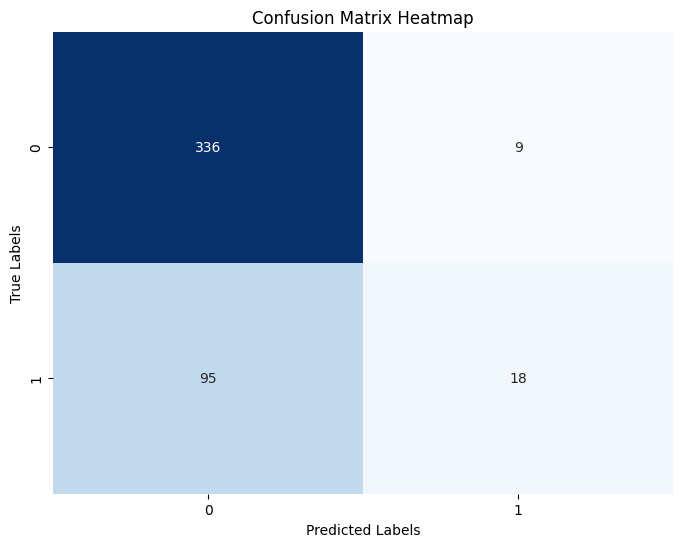

In [57]:
# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()